# Car Price Prediction (HW-3)
## We'll keep working with the MSRP variable, and we'll transform it to a classification task.
The data can be found via the [link](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv) 

In [123]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [108]:
df = pd.read_csv('data.csv')

In [109]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [110]:
df = df[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']]

In [111]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Data preparation

In [112]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [113]:
df.fillna(0,inplace=True)

In [114]:
df.rename(columns={'msrp':'price'}, inplace=True)

In [115]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Data Exploration

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64


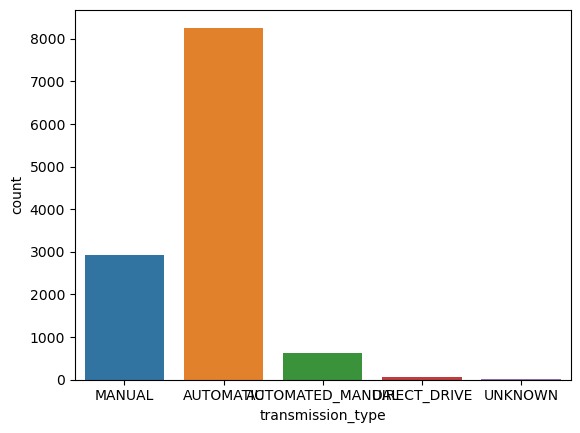

In [29]:
# check for the most common transmission type
print(df.transmission_type.value_counts());
sns.countplot(df, x='transmission_type');

C:\Users\emman\AppData\Local\Temp\ipykernel_6440\1584585271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

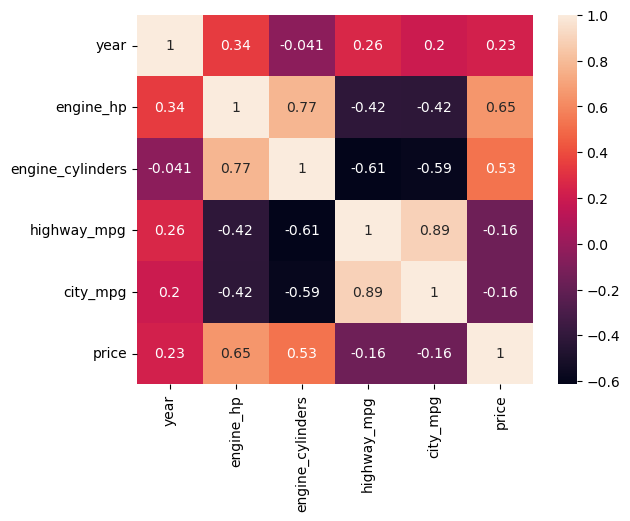

In [125]:
# Assess the correlation between the numeric variables
sns.heatmap(df.corr(),annot=True)


In [41]:
df['above_average'] = (df.price > df.price.mean()).astype(int)

In [42]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [45]:
del df['price']

In [46]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [51]:
train_init, test = train_test_split(df,test_size=0.2,random_state=42)

In [52]:
train, val = train_test_split(train_init,test_size=0.25,random_state=42)

In [53]:
print(train.shape, val.shape, test.shape)

(7148, 10) (2383, 10) (2383, 10)


In [57]:
train_label = train.above_average
val_label = val.above_average
test_label = test.above_average

del train['above_average']
del val['above_average']
del test['above_average']

In [64]:
print(
    round(mutual_info_score(train.make, train_label),2),
    round(mutual_info_score(train.model, train_label),2),
    round(mutual_info_score(train.transmission_type, train_label),2),
    round(mutual_info_score(train.vehicle_style, train_label),2)
)

0.24 0.46 0.02 0.08


In [72]:
train_dict = train.to_dict(orient='record')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

C:\Users\emman\AppData\Local\Temp\ipykernel_6440\724761930.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train.to_dict(orient='record')


In [73]:
val_dict = val.to_dict(orient='record')
X_val = dv.transform(val_dict)
test_dict = test.to_dict(orient='record')
X_test = dv.transform(test_dict)

C:\Users\emman\AppData\Local\Temp\ipykernel_6440\1969737649.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val.to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\1969737649.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test.to_dict(orient='record')


### Train Model

In [74]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, train_label)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [84]:
y_pred = model.predict(X_val)

In [94]:
original_acc = round((y_pred == val_label).mean(),2)

In [126]:
original_acc

0.95

In [95]:
col = list(train.columns)
print(col)
col.remove('make')
print(col)

['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']
['model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']


In [101]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
for feature in features:  
    col = list(train.columns)
    col.remove(f'{feature}')
    train_dict = train[col].to_dict(orient='record')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)

    val_dict = val[col].to_dict(orient='record')
    X_val = dv.transform(val_dict)
    test_dict = test[col].to_dict(orient='record')
    X_test = dv.transform(test_dict)
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, train_label)
    y_pred = model.predict(X_val)
    print(f'{feature} was eliminated')
    print(round((y_pred == val_label).mean(),2))
    print(abs(original_acc - (y_pred == val_label).mean()))
    print('\n')

C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:9: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:11: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test[col].to_dict(orient='record')


year was eliminated
0.95
0.0020352496852705793




C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:9: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:11: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test[col].to_dict(orient='record')


engine_hp was eliminated
0.93
0.019660092320604283




C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:9: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:11: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test[col].to_dict(orient='record')


transmission_type was eliminated
0.95
0.004972723457826178




C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:9: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val[col].to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\12198048.py:11: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test[col].to_dict(orient='record')


city_mpg was eliminated
0.95
0.004133445237096023




## Question 6

In [117]:
df2 = df.copy()

In [118]:
train_init, test = train_test_split(df2,test_size=0.2,random_state=42)
train, val = train_test_split(train_init,test_size=0.25,random_state=42)


In [119]:
y_train = np.log1p(train.price.values)
y_val = np.log1p(val.price.values)
y_test = np.log1p(test.price.values)

del train['price']
del val['price']
del test['price']

In [120]:
train_dict = train.to_dict(orient='record')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = val.to_dict(orient='record')
X_val = dv.transform(val_dict)
test_dict = test.to_dict(orient='record')
alX_test = dv.transform(test_dict)

C:\Users\emman\AppData\Local\Temp\ipykernel_6440\4145166698.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train.to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\4145166698.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val.to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_6440\4145166698.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test.to_dict(orient='record')


In [124]:
alphas  = [0, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = Ridge(solver='sag', random_state=42, alpha=alpha)
    model.fit(X_train, train_label)
    y_pred = model.predict(X_val)
    print(f' The rmse is {round(mean_squared_error(y_val, y_pred), 3)} when the alpha is {alpha}')

c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 The rmse is 97.273 when the alpha is 0


c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 The rmse is 97.273 when the alpha is 0.01


c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 The rmse is 97.273 when the alpha is 0.1


c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 The rmse is 97.273 when the alpha is 1
 The rmse is 97.273 when the alpha is 10


c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
